<a href="https://colab.research.google.com/github/xuziyue/tensorflow-models/blob/main/1_4_CNN_image_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [4]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:00<00:00, 276MB/s]


In [5]:
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 177MB/s]


In [6]:
# Unzip the dataset
zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('./validation-horse-or-human')
zip_ref.close()

In [7]:
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [8]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_hames = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_hames[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse37-1.png', 'horse21-3.png', 'horse46-8.png', 'horse26-8.png', 'horse38-5.png', 'horse45-9.png', 'horse41-4.png', 'horse04-2.png', 'horse02-9.png', 'horse14-6.png']
TRAIN SET HUMANS: ['human14-15.png', 'human03-18.png', 'human04-25.png', 'human12-28.png', 'human06-18.png', 'human11-29.png', 'human10-18.png', 'human16-06.png', 'human01-06.png', 'human16-13.png']
VAL SET HORSES: ['horse5-164.png', 'horse5-203.png', 'horse4-159.png', 'horse4-548.png', 'horse2-254.png', 'horse5-360.png', 'horse5-065.png', 'horse3-171.png', 'horse4-501.png', 'horse5-100.png']
VAL SET HUMANS: ['valhuman04-16.png', 'valhuman05-19.png', 'valhuman05-09.png', 'valhuman01-01.png', 'valhuman03-16.png', 'valhuman04-00.png', 'valhuman02-06.png', 'valhuman05-03.png', 'valhuman04-18.png', 'valhuman01-07.png']


In [9]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Training Set Visualization

In [17]:
pic_index = 0

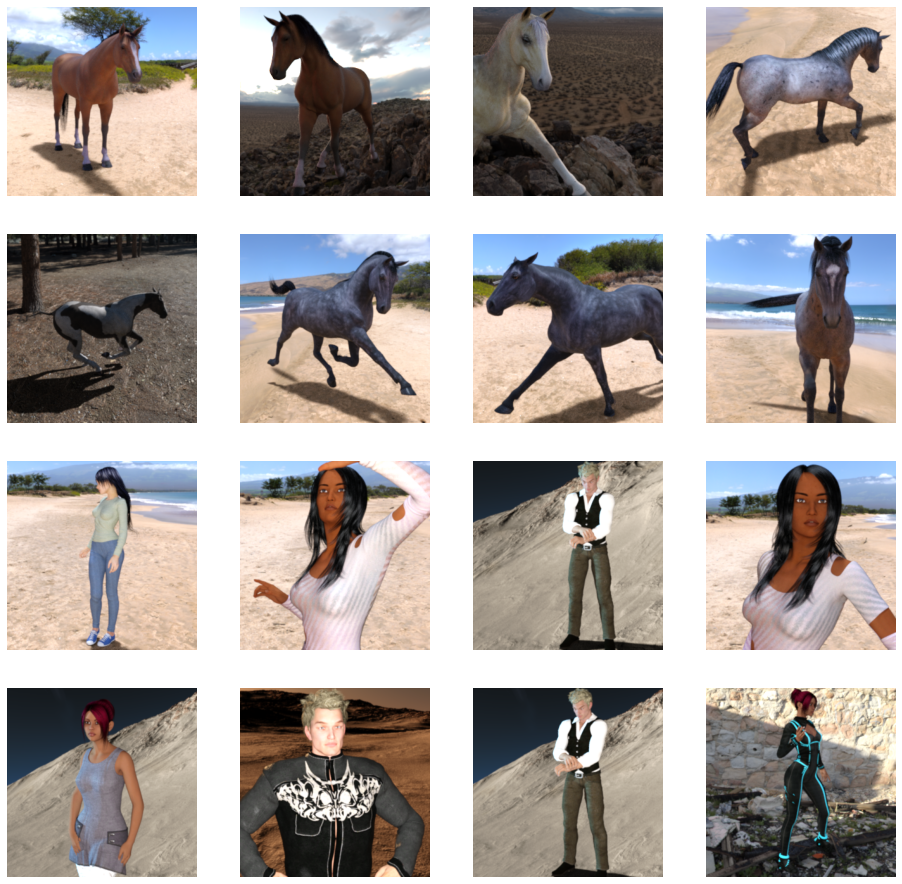

In [19]:
nrows = 4
ncols = 4
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Validation Set Visualization

In [20]:
pic_index = 0

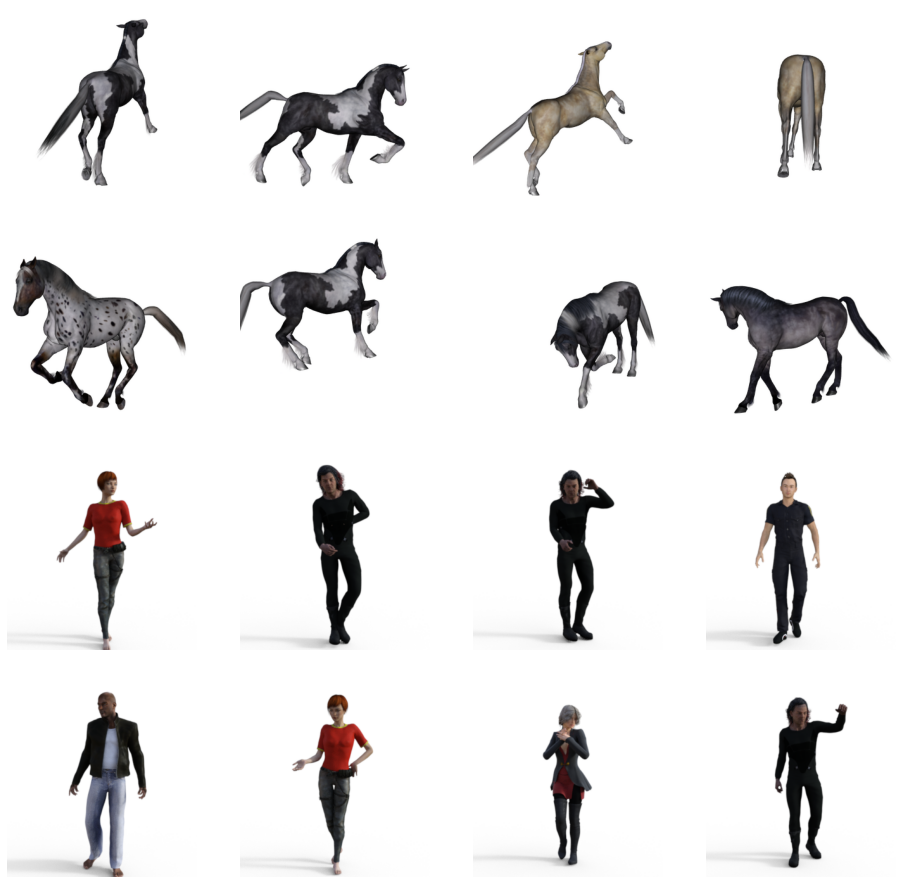

In [21]:
nrows = 4
ncols = 4
pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(validation_horse_dir, fname) 
                for fname in validation_horse_hames[pic_index-8:pic_index]]
next_human_pix = [os.path.join(validation_human_dir, fname) 
                for fname in validation_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [22]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
                                   tf.keras.layers.MaxPooling2D(2, 2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [24]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
train_batch_size = 128
validation_batch_size = 32
train_data_size = len(os.listdir(train_horse_dir)) + len(os.listdir(train_human_dir))
validation_data_size = len(os.listdir(validation_horse_dir)) + len(os.listdir(validation_human_dir))

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255.0)
validation_datagen = ImageDataGenerator(rescale=1/255.0)

# Flow training images in batches of 128 using train_datagen generator
train_data_root_dir = './horse-or-human'
train_generator = train_datagen.flow_from_directory(directory=train_data_root_dir,
                                  target_size=(300, 300),
                                  batch_size=train_batch_size,
                                  class_mode='binary')

validation_data_root_dir = './validation-horse-or-human'
validation_generator = validation_datagen.flow_from_directory(directory=validation_data_root_dir,
                                  target_size=(300, 300),
                                  batch_size=validation_batch_size,
                                  class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [30]:
history = model.fit(x=train_generator,
                    steps_per_epoch=train_data_size//train_batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_data_size//validation_batch_size,
                    epochs=15,
                    verbose=1)

Epoch 1/15
8/8 [==============================] - 10s 848ms/step - loss: 0.8316 - accuracy: 0.4872 - val_loss: 0.6524 - val_accuracy: 0.7539
Epoch 2/15
8/8 [==============================] - 7s 928ms/step - loss: 0.7147 - accuracy: 0.6680 - val_loss: 0.6311 - val_accuracy: 0.6992
Epoch 3/15
8/8 [==============================] - 7s 857ms/step - loss: 1.2911 - accuracy: 0.7175 - val_loss: 0.5394 - val_accuracy: 0.7383
Epoch 4/15
8/8 [==============================] - 7s 851ms/step - loss: 0.3704 - accuracy: 0.8554 - val_loss: 0.7563 - val_accuracy: 0.8594
Epoch 5/15
8/8 [==============================] - 7s 851ms/step - loss: 0.2407 - accuracy: 0.9010 - val_loss: 0.7230 - val_accuracy: 0.8281
Epoch 6/15
8/8 [==============================] - 7s 856ms/step - loss: 0.1280 - accuracy: 0.9477 - val_loss: 1.4720 - val_accuracy: 0.7891
Epoch 7/15
8/8 [==============================] - 7s 854ms/step - loss: 0.4770 - accuracy: 0.8743 - val_loss: 1.1078 - val_accuracy: 0.7109
Epoch 8/15
8/8 [===

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = './' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  print(images.shape)
  
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse_2.jpeg to horse_2 (5).jpeg
(1, 300, 300, 3)
[0.]
horse_2.jpeg is a horse


###Visualizing Intermediate Representations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


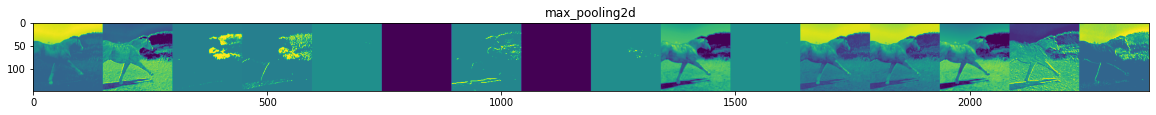

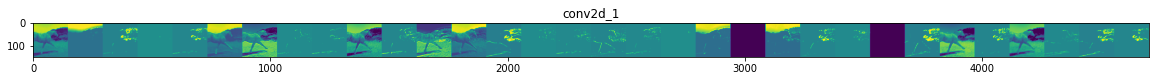

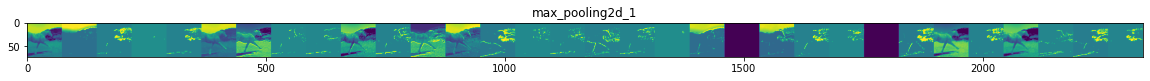

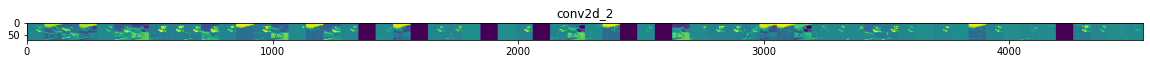

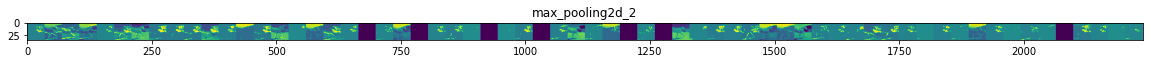

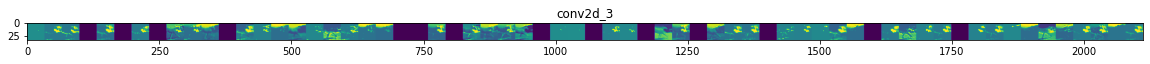

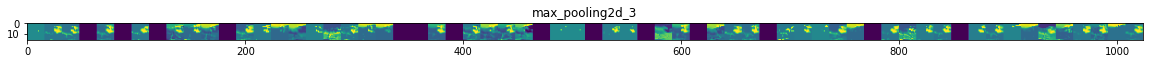

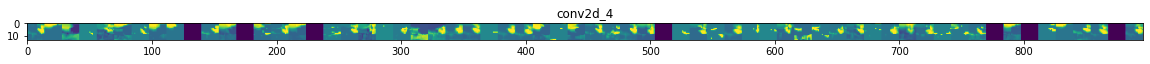

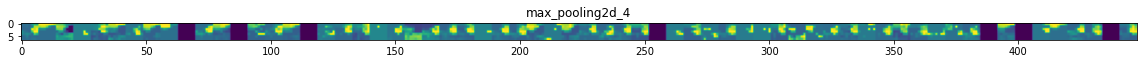

In [32]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

###Clean Up

In [ ]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)